### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.shape

(5000, 14)

In [7]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
data.isnull().values.any()

False

In [10]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
data[data['Experience'] == -1]['Experience'].count()

33

In [12]:
data[data['Experience'] == -2]['Experience'].count()

15

In [13]:
data[data['Experience'] == -3]['Experience'].count()

4

In [14]:
data['Experience'].replace( to_replace = -1, value = np.nan,inplace=True)
data['Experience'].replace( to_replace = -2, value = np.nan,inplace=True)
data['Experience'].replace( to_replace = -3, value = np.nan,inplace=True)

In [15]:
data['Experience'].isnull().sum()

52

In [16]:
data['Experience'].fillna(data['Experience'].median(),inplace=True)

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### 2. EDA: Study the data distribution in each attribute and target variable, share your findings

In [18]:
#Number of unique in each column?

data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [19]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [20]:
data.groupby(['Personal Loan']).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [21]:
len(data[data['Mortgage']== 0])

3462

In [22]:
data.groupby('Mortgage')['ID'].count()

Mortgage
0      3462
75        8
76       12
77        4
78       15
       ... 
590       1
601       1
612       1
617       1
635       1
Name: ID, Length: 347, dtype: int64

In [23]:
data.groupby('CCAvg').count()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
CCAvg,,,,,,,,,,,,,
0.0,106,106,106,106,106,106,106,106,106,106,106,106,106
0.1,183,183,183,183,183,183,183,183,183,183,183,183,183
0.2,204,204,204,204,204,204,204,204,204,204,204,204,204
0.3,241,241,241,241,241,241,241,241,241,241,241,241,241
0.4,179,179,179,179,179,179,179,179,179,179,179,179,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.8,9,9,9,9,9,9,9,9,9,9,9,9,9
8.9,1,1,1,1,1,1,1,1,1,1,1,1,1
9.0,2,2,2,2,2,2,2,2,2,2,2,2,2


In [24]:
len(data[data['CCAvg']== 0.0])

106

In [25]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [26]:
data.dtypes

ID                      int64
Age                     int64
Experience            float64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [27]:
x= ['ZIP Code','Family','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']

for i in x:
    
    print(i)
    display(data[i].value_counts().reset_index())
    

ZIP Code


,index,ZIP Code
0,94720,169
1,94305,127
2,95616,116
3,90095,71
4,93106,57
...,...,...
462,96145,1
463,94970,1
464,94598,1
465,90068,1


Family


,index,Family
0,1,1472
1,2,1296
2,4,1222
3,3,1010


Education


,index,Education
0,1,2096
1,3,1501
2,2,1403


Mortgage


,index,Mortgage
0,0,3462
1,98,17
2,103,16
3,119,16
4,83,16
...,...,...
342,541,1
343,509,1
344,505,1
345,485,1


Personal Loan


,index,Personal Loan
0,0,4520
1,1,480


Securities Account


,index,Securities Account
0,0,4478
1,1,522


CD Account


,index,CD Account
0,0,4698
1,1,302


Online


,index,Online
0,1,2984
1,0,2016


CreditCard


,index,CreditCard
0,0,3530
1,1,1470


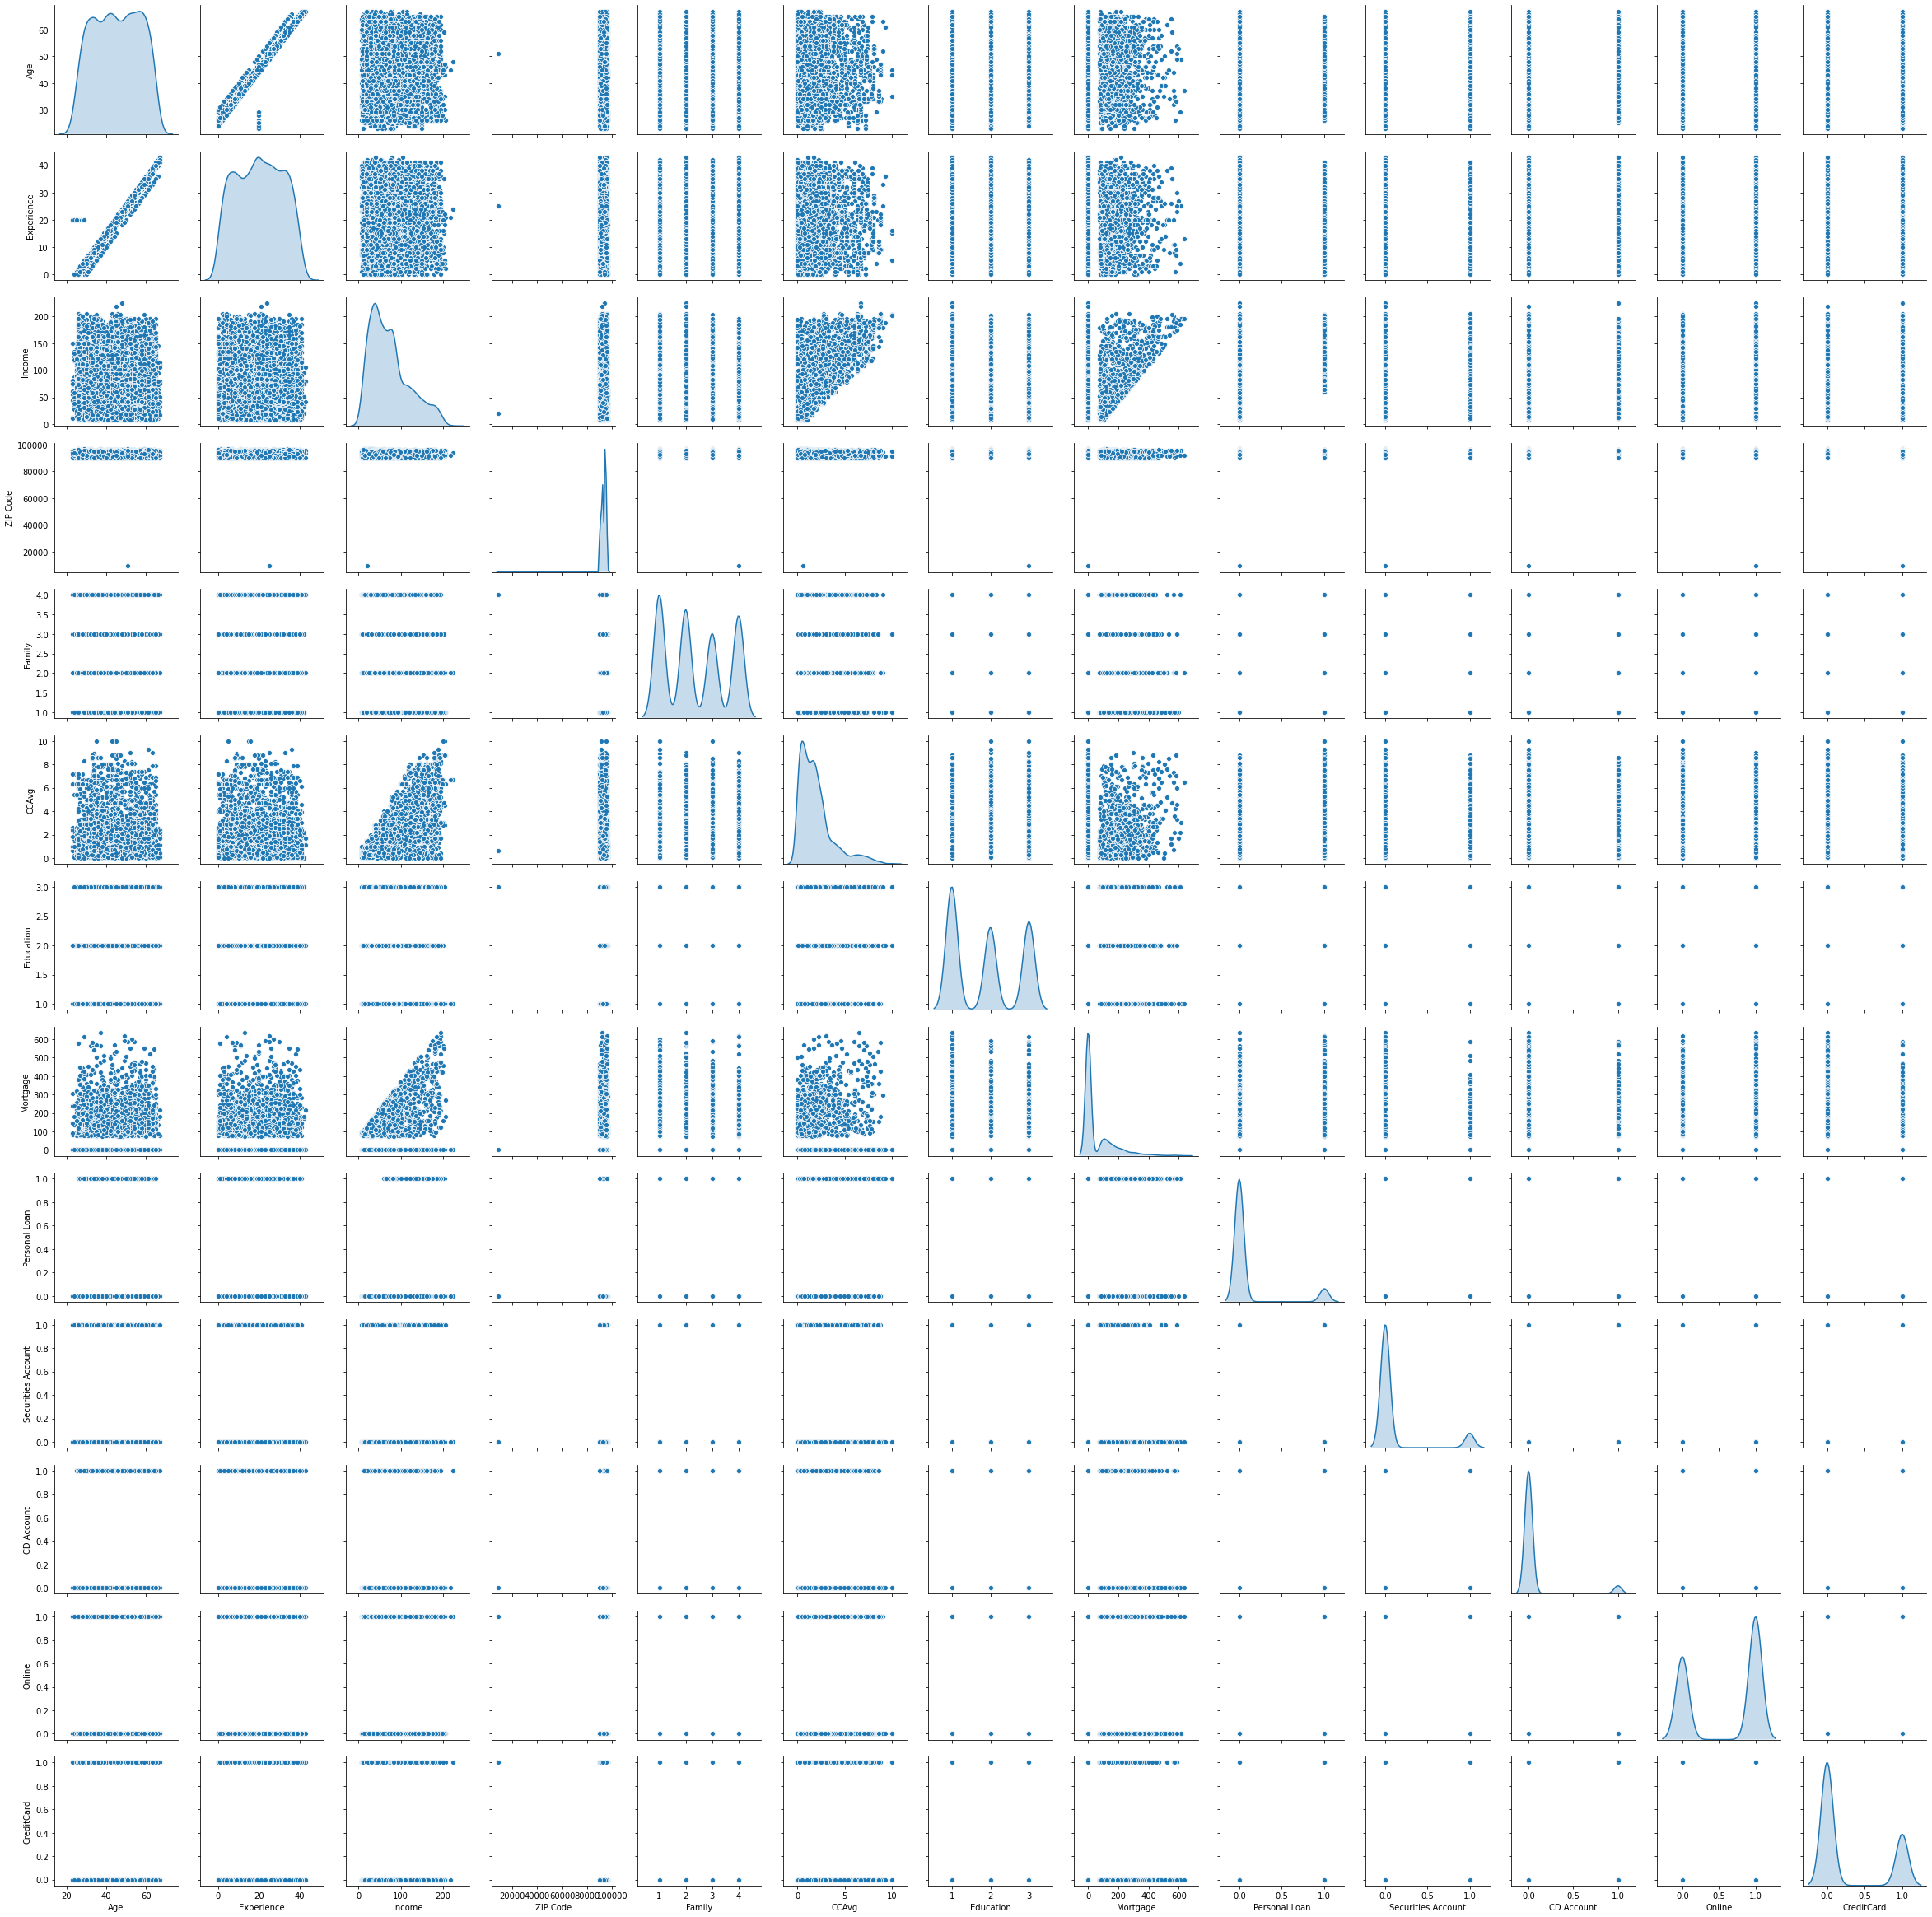

In [28]:
sns.pairplot(data.iloc[:,1:],diag_kind='kde')

In [29]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


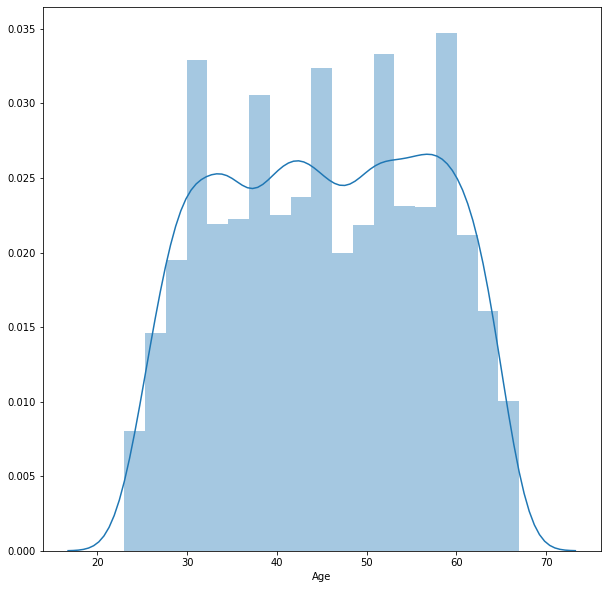

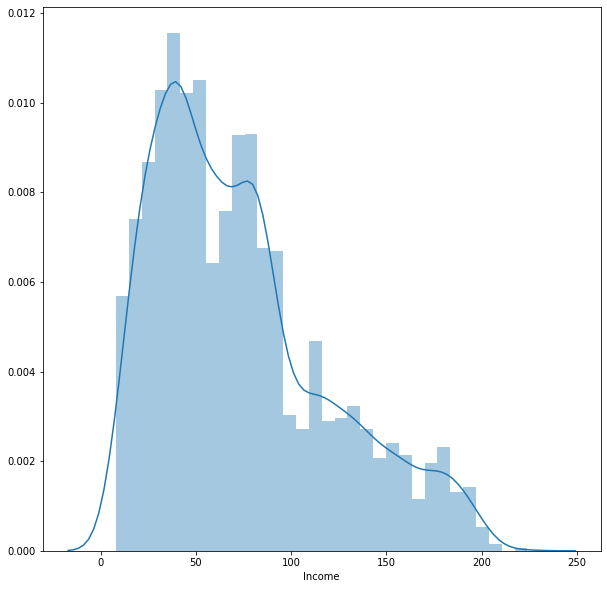

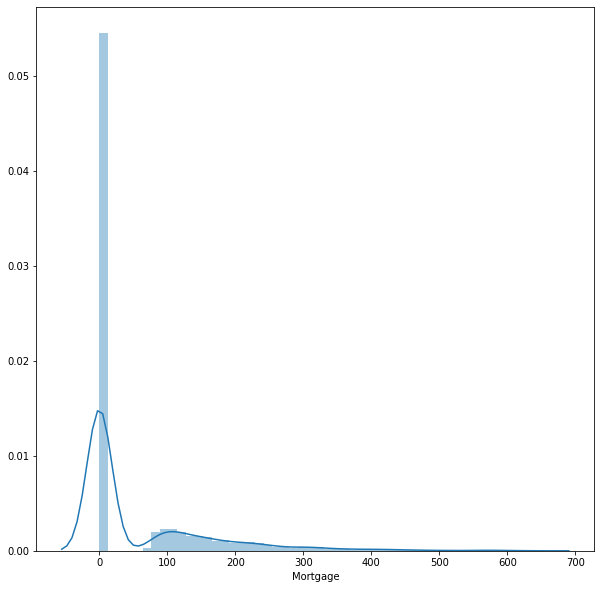

In [30]:
for i in ['Age','Income','Mortgage']:
    plt.figure(figsize = (10,10))
    sns.distplot(data[i])
    plt.show()

<AxesSubplot:>

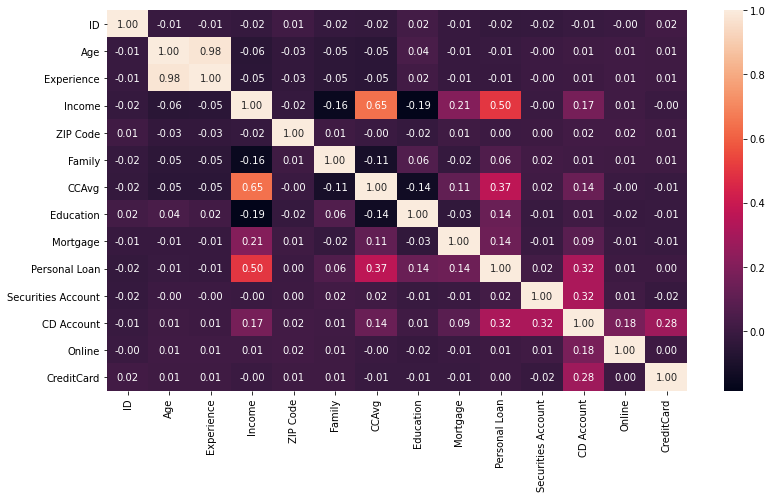

In [31]:
plt.figure(figsize=(13,7))

sns.heatmap(data.corr(),annot=True, fmt='.2f')

#### Age and Experience is highly correlated

In [32]:
# Dropping ID, Experience and Zipcode

data.drop('ID',axis=1, inplace=True)
data.drop('Experience',axis=1, inplace=True)
data.drop('ZIP Code',axis=1, inplace=True)


In [33]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

<AxesSubplot:xlabel='Family', ylabel='Income'>

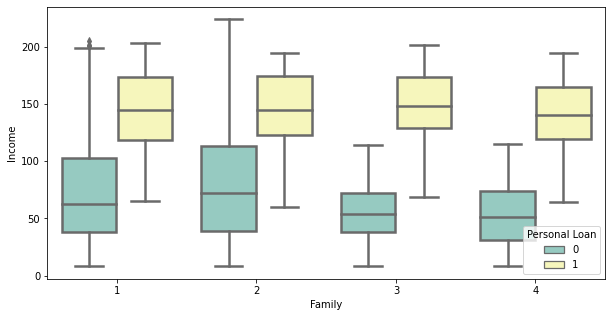

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data.Family, y=data.Income,hue=data['Personal Loan'],palette='Set3',linewidth=2.5)

<AxesSubplot:xlabel='Education', ylabel='Income'>

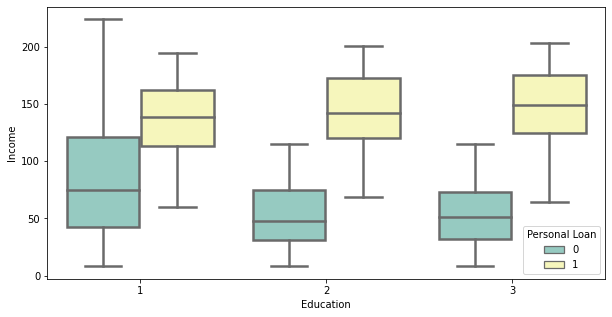

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Education', y='Income' , hue='Personal Loan',data=data ,palette='Set3',linewidth=2.5)

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

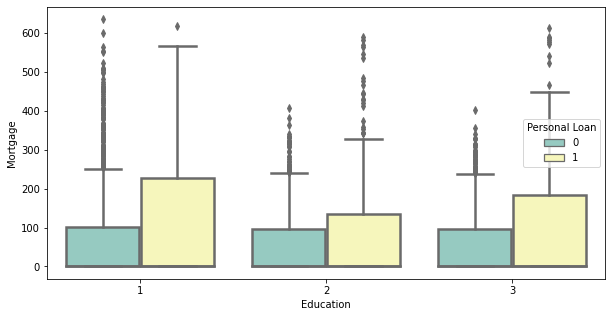

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Education', y='Mortgage' , hue='Personal Loan',data=data ,palette='Set3',linewidth=2.5)

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

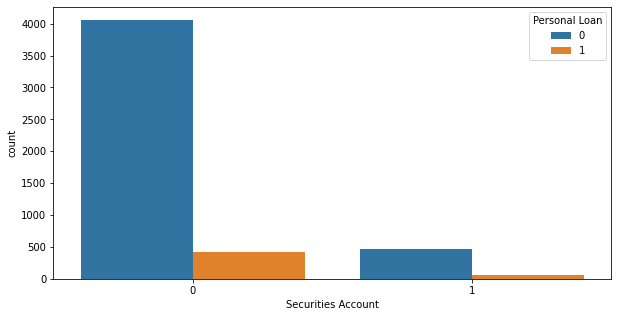

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='Securities Account', data=data, hue='Personal Loan')

<AxesSubplot:xlabel='Family', ylabel='count'>

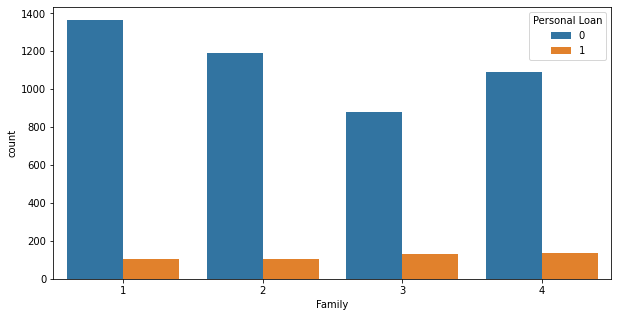

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='Family', data=data, hue='Personal Loan')

<AxesSubplot:xlabel='CD Account', ylabel='count'>

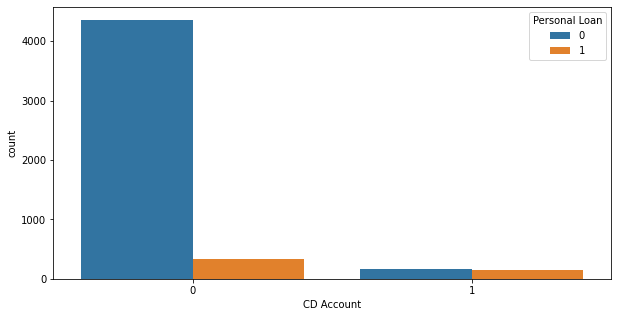

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='CD Account', data=data, hue='Personal Loan')

<AxesSubplot:xlabel='CCAvg'>

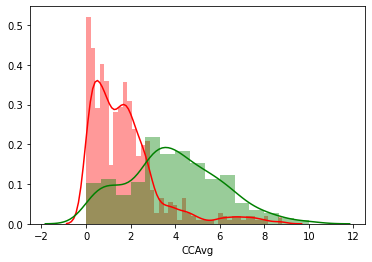

In [40]:
sns.distplot(data[data['Personal Loan'] == 0]['CCAvg'],color='r')
sns.distplot(data[data['Personal Loan'] == 1]['CCAvg'],color='g')

In [41]:
data.groupby(['Personal Loan']).median()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.0,59.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,142.5,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


In [42]:
data.groupby(['Personal Loan']).mean()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.367257,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


### 3. Split the data into training and test set in the ratio of 70:30 respectively

In [43]:
X=data.drop('Personal Loan',axis=1)
y=data['Personal Loan']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [45]:
X_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
717,59,94,3,0.5,1,0,0,0,0,1
2496,63,32,3,0.7,2,141,0,0,0,0
2469,43,89,1,0.1,2,307,0,0,0,1
1375,50,179,1,2.9,3,0,0,0,0,1
2742,39,89,2,0.4,1,0,0,0,1,0


### 4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance

In [46]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=7)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
X_test.iloc[0]

Age                   42.0
Income                34.0
Family                 3.0
CCAvg                  2.0
Education              3.0
Mortgage               0.0
Securities Account     0.0
CD Account             0.0
Online                 0.0
CreditCard             1.0
Name: 3406, dtype: float64

In [48]:
X_test.values[0]

array([42., 34.,  3.,  2.,  3.,  0.,  0.,  0.,  0.,  1.])

In [49]:
# Predict values output with new data 
new_data=[46., 90.,  3.,  2.,  3.,  0.,  0.,  1.,  0.,  1.]
model.predict(np.array(new_data).reshape(1,-1))

array([1])

In [50]:
y_test

3406    0
757     0
3624    0
4544    0
3235    0
       ..
460     0
2492    0
3028    0
3437    0
4579    0
Name: Personal Loan, Length: 1500, dtype: int64

In [51]:
y_predict = model.predict(X_test)

In [52]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
z=X_test.copy()
z['Actual Personal Loan '] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Actual Personal Loan,Predicted Personal Loan
3406,42,34,3,2.0,3,0,0,0,0,1,0,0
757,52,81,3,1.8,2,0,1,0,0,0,0,0
3624,58,70,1,1.4,3,0,0,0,0,0,0,0
4544,28,80,3,2.5,1,0,0,0,1,0,0,0
3235,60,39,2,1.6,3,0,0,0,1,0,0,0


In [54]:
coef_df=pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_

In [55]:
coef_df

,0,1,2,3,4,5,6,7,8,9,intercept
0,-0.0112,0.040128,0.517234,0.122866,1.200997,0.000493,-0.635962,3.024465,-0.566624,-0.979576,-9.510455


In [56]:
model_score=model.score(X_test,y_test)

In [57]:

model_score

0.9533333333333334

#### confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

In [99]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score

def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Training accouracy: 0.9477142857142857

Testing accouracy: 0.9533333333333334

Confusion Matrix:


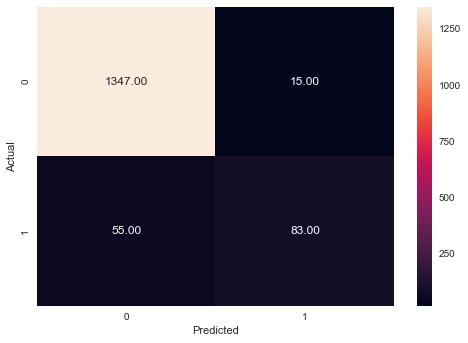

None

Recall: 0.6014492753623188

Precision: 0.8469387755102041

F1 Score: 0.7033898305084745

Roc Auc Score: 0.795218029751644


In [105]:
print("Training accouracy:",model.score(X_train,y_train))
print()
print("Testing accouracy:",model.score(X_test,y_test))
print()
print("Confusion Matrix:")
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

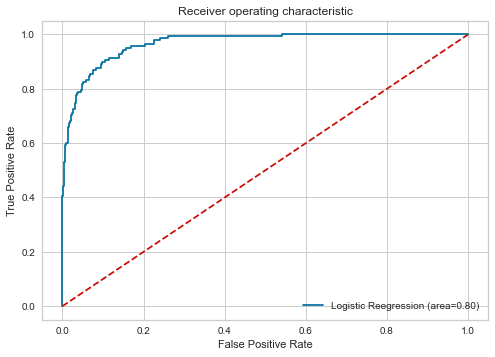

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc=roc_auc_score(y_test,model.predict(X_test))
fpr,tpr,threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Reegression (area=%0.2f)" %logit_roc_auc )
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not?

In [107]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [108]:
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model1 = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model1.fit(X_train, y_train) 
    y_predict = model1.predict(X_test)     
    train_score.append(round(model1.score(X_train, y_train),3))
    test_score.append(round(model1.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.951, 0.936, 0.946, 0.891, 0.89]

[0.953, 0.945, 0.954, 0.907, 0.905]


In [109]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']
for i in solver:
    model1 = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  # changing values of solver
    model1.fit(X_train, y_train) 
    y_predict = model1.predict(X_test)     
    train_score.append(round(model1.score(X_train, y_train),3))
    test_score.append(round(model1.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.952, 0.891]

[0.953, 0.906]


In [110]:
model1 = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced')
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("Trainig Accuracy:",model1.score(X_train,y_train))
print()
print("Testing Accuracy:",model1.score(X_test,y_test))

Trainig Accuracy: 0.8922857142857142

Testing Accuracy: 0.892


In [111]:
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model1 = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  
    model1.fit(X_train, y_train) 
    y_predict = model1.predict(X_test)     
    train_score.append(round(model1.score(X_train,y_train),3)) 
    test_score.append(round(model1.score(X_test, y_test),3))
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.799, 0.891, 0.893, 0.893, 0.892, 0.892]

[0.805, 0.89, 0.889, 0.891, 0.893, 0.892]


Trainig accuracy 0.8928571428571429

Testing accuracy 0.8913333333333333

Confusion Matrix


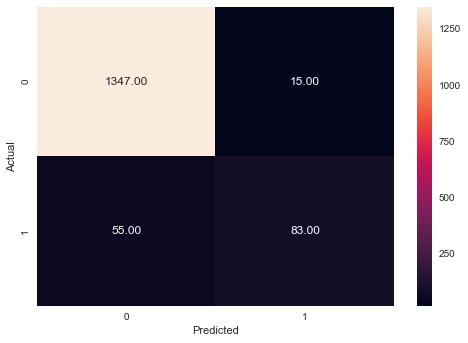

None

Recall: 0.6014492753623188

Precision: 0.8469387755102041

F1 Score: 0.7033898305084745

Roc Auc Score: 0.795218029751644


In [112]:
model1 = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model1.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model1.score(X_train,y_train))  
print()
print("Testing accuracy",model1.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [113]:
!pip install yellowbrick

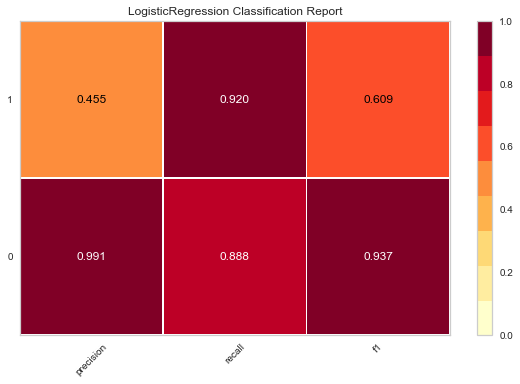

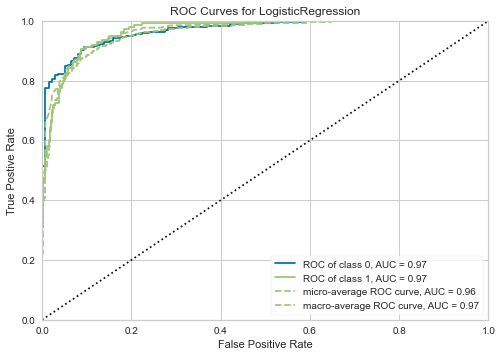

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [114]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

viz=ClassificationReport(model1)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc=ROCAUC(model1)
roc.fit(X_train,y_train)
roc.score(X_test, y_test)
roc.show()

#### GridSearchCV

In [115]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [116]:
parm_grid=[{'solver': ['newton-cg','lbfgs','liblinear','sag','saga'], 'C': [0.001, 0.01, 0.1, 0.25, 0.75, 1], 
           'class_weight': ['balanced'],'penalty': ['l2']}]

In [117]:
grid_search=GridSearchCV(model1, parm_grid, cv=5, verbose=0)

In [118]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=0.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.001, 0.01, 0.1, 0.25, 0.75, 1], 'class_weight': ['balanced'], 'penalty': ['l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [120]:
model_final=LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [121]:
model_final.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [122]:
predicitions=model_final.predict(X_test)

In [123]:
predicitions

array([0, 0, 0, ..., 0, 0, 0])

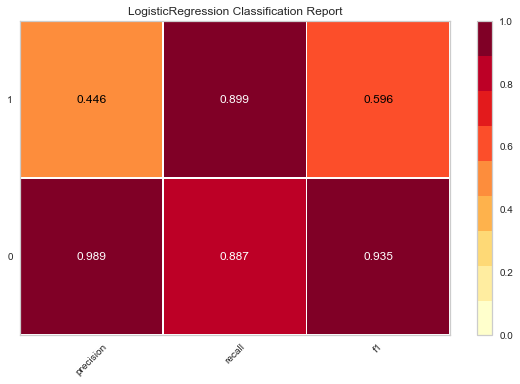

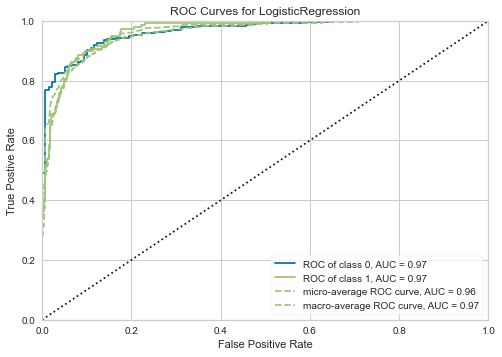

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [124]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

viz=ClassificationReport(model_final)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc=ROCAUC(model_final)
roc.fit(X_train,y_train)
roc.score(X_test, y_test)
roc.show()

### 6. Give Business understanding of your model?

* Model give us the ability targeted campign, which has much better conversion than 9.6% seen earlier. 
* Implementing this model will give us 84.69% conversion. However, we will be missing out on (55%) leads and 40% of potential leads were missed by the model